# Session Outline

- Go through Excercises of Session 7
- Pos Tagging
- Senses
- Named Entity Recognition
- Excercises

In [1]:
import numpy as np
from numpy import *
from numpy import random # random data
import csv
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import nltk
nltk.download('punkt')
import codecs
import string
from nltk.corpus import stopwords
import re
import pprint
import random
from urllib import request
from nltk import word_tokenize
from nltk.corpus import brown
from nltk.corpus import wordnet as wn

from nltk.stem import SnowballStemmer
snowball_stemmer = SnowballStemmer("english")
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /Users/Ashrakat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Pos-Tagging

### In POS tagging the probability of a POS in the previous words conditions the probability of the tag for the current word.

check categories of pos tagger here: https://www.nltk.org/book/ch05.html


In [12]:
sent="I need access to the cloud"

- is "access here a noun or a verb"

Two probablities evaluated:
1. Probability of flies being a verb or a noun
2. Probablity of a verb following a noun

In [13]:
sent = nltk.word_tokenize(sent)
sent = nltk.pos_tag(sent)
print(sent)

[('I', 'PRP'), ('need', 'VBP'), ('access', 'NN'), ('to', 'TO'), ('the', 'DT'), ('cloud', 'NN')]


In [14]:
nltk.help.upenn_tagset("NN")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [15]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()


dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[50].split("\t")[3]

# split into sentences
sentences = nltk.sent_tokenize(article) 

sentence = nltk.word_tokenize(sentences[4])

# you use the pos-tagger (it gives you back a list of tuples (word,pos))
pos_sentence = nltk.pos_tag(sentence)
print("pos-tagged",pos_sentence)

lemma_word = [wordnet_lemmatizer.lemmatize(token.lower(),"x") if "x" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in pos_sentence]
print()
print ("lemmatized", lemma_word)

pos-tagged [('DAMN', 'NNP'), ('Fans', 'NNS'), ('took', 'VBD'), ('to', 'TO'), ('Twitter', 'NNP'), ('in', 'IN'), ('their', 'PRP$'), ('droves', 'NNS'), ('to', 'TO'), ('commend', 'VB'), ('the', 'DT'), ('team', 'NN'), ('and', 'CC'), ('their', 'PRP$'), ('supporters', 'NNS'), ('for', 'IN'), ('their', 'PRP$'), ('classy', 'JJ'), ('performance', 'NN'), ('that', 'IN'), ('many', 'JJ'), ('credited', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('highlight', 'NN'), ('of', 'IN'), ('Euro-2016', 'NNP'), ('so', 'IN'), ('far', 'RB'), ('.', '.')]

lemmatized ['damn', 'fan', 'took', 'to', 'twitter', 'in', 'their', 'drove', 'to', 'commend', 'the', 'team', 'and', 'their', 'supporter', 'for', 'their', 'classy', 'performance', 'that', 'many', 'credited', 'a', 'the', 'highlight', 'of', 'euro-2016', 'so', 'far', '.']


## Single function

In [16]:


exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def nlp_pipeline1(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    text=text.lower()
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
   
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
        # pos tagger
    text = nltk.pos_tag(text)

    return text

## In Pandas

In [17]:
rt = pd.read_csv('/Users/Ashrakat/Desktop/rt_dataset.tsv',delimiter="\t")
rt.head()

,date,title,topic,content
0,"16 Sep, 2016 14:08","Putin: We don’t approve of WADA hackers, but i...",news,"We don’t approve of what hackers do, but what ..."
1,"11 Sep, 2016 22:33","Hillary Clinton diagnosed with pneumonia, canc...",usa,"Dr. Lisa Bardack, Clinton’s personal doctor s..."
2,"2 Dec, 2016 20:15",Ronaldinho and Riquelme offer to come out of r...,sport,READ MORE: 71 dead after plane carrying Brazil...
3,"9 Feb, 2016 21:13",NATO & European leaders whip up hysteria over ...,news,“The leaders of NATO member states and a numbe...
4,"5 Apr, 2016 18:01",US ‘Gremlin’ drones designed to cause missile ...,usa,"Four firms, including fighter jet manufacturer..."


In [18]:
rt=rt[0:100]

In [19]:
rt["content"]=rt["content"].apply(nlp_pipeline1)

In [20]:
rt.head()

,date,title,topic,content
0,"16 Sep, 2016 14:08","Putin: We don’t approve of WADA hackers, but i...",news,"[(approve, VB), (hackers, NNS), (done, VBN), (..."
1,"11 Sep, 2016 22:33","Hillary Clinton diagnosed with pneumonia, canc...",usa,"[(lisa, JJ), (bardack, NN), (clinton, NN), (pe..."
2,"2 Dec, 2016 20:15",Ronaldinho and Riquelme offer to come out of r...,sport,"[(read, VBN), (dead, JJ), (plane, NN), (carryi..."
3,"9 Feb, 2016 21:13",NATO & European leaders whip up hysteria over ...,news,"[(leaders, NNS), (nato, VBP), (member, NN), (s..."
4,"5 Apr, 2016 18:01",US ‘Gremlin’ drones designed to cause missile ...,usa,"[(four, CD), (firms, NNS), (including, VBG), (..."


In [21]:
rt.content = rt.content.apply(lambda x: [(t[0],) for t in x if t[1]=='VB' or t[1]=='VBN'])
#keep element 0 if elemet 1 is VB or VBNs



In [22]:
rt.head()

,date,title,topic,content
0,"16 Sep, 2016 14:08","Putin: We don’t approve of WADA hackers, but i...",news,"[(approve,), (done,), (cited,), (banned,), (re..."
1,"11 Sep, 2016 22:33","Hillary Clinton diagnosed with pneumonia, canc...",usa,"[(released,), (given,), (fallen,), (driven,), ..."
2,"2 Dec, 2016 20:15",Ronaldinho and Riquelme offer to come out of r...,sport,"[(read,), (joined,), (come,), (club,), (taken,..."
3,"9 Feb, 2016 21:13",NATO & European leaders whip up hysteria over ...,news,"[(support,), (approved,), (involved,), (known,)]"
4,"5 Apr, 2016 18:01",US ‘Gremlin’ drones designed to cause missile ...,usa,"[(brought,), (unmanned,), (named,), (take,), (..."


# Word-Sense-Disambiguation

### WSD is the task of assigning a sense to a word, given a context.

- Words are ambigous
- Language is very contextual and the meanings of the words depend upon the context in which you are using it.
- The sense of a word is a way of identifying how we use a given word by associating its definition

read more: https://www.linkedin.com/pulse/wordnet-word-sense-disambiguation-wsd-nltk-aswathi-nambiar/

### How does it work?

- using Thesaurus (WordNet is a large lexical database of English.)
- Wordnet includes for example synonyms and annonyms
- using Machine Learning

For example, consider the two sentences.


**lesk** is one of the algorithms that help disambiguate and estimate the sense of words in a sentence

1. Retrieve all sense definitions of target word 
2. Compare each sense definition with the sense definitions of the other words in context 
3. Choose the sense with the highest overlap



In [60]:
import nltk
from nltk.corpus import wordnet
from nltk.wsd import lesk
#lesk is one of the algorithms that help disambiguate and estimate the sense of words in a sentence

sent1="the sea bass is delicious"
sent2="musical bass"

In [61]:
lesk(sent1.split(),"bass","n")

#lemma.pos.countnumber

Synset('sea_bass.n.01')

In [62]:
print(lesk(sent2.split(),"bass","n"))

Synset('bass.n.07')


In [63]:
#rt dataset
article = dataset[261].split("\t")[3]

print (article)

“Rustan Magomedovich Aselderov (Abu Muhammad), born in 1981, the leader of the Vilayat Kavkaz section of the Islamic State international terrorist group, was among the militants eliminated alongside four of his close associates,” the FSB said in a statement. The terrorist cell was neutralized near the southern Russian city of Makhachkala, the capital of the Republic of Dagestan. Aselderov and four other militants were found hiding out in a house in the village. After the hideout was surrounded, the police started negotiations and asked the militants to surrender. In response, the terrorists fired automatic weapons and were killed by return fire. None of the officers taking part in the operation were injured. A large cache of weapons was then discovered in the hideout, including automatic rifles, munitions and explosives. The FSB said Aselderov was one of the organizers of the terrorist attack on Volgograd’s train station on December 29, 2013, which killed 18 people and left dozens inju

In [35]:
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]

    return text
# let's use our pipeline!
clean_article = nlp_pipeline(article)
print (clean_article)

['rustan', 'magomedovich', 'aselderov', 'abu', 'muhammad', 'bear', 'leader', 'vilayat', 'kavkaz', 'section', 'islamic', 'state', 'international', 'terrorist', 'group', 'among', 'militant', 'eliminate', 'alongside', 'four', 'close', 'associate', 'fsb', 'say', 'statement', 'terrorist', 'cell', 'neutralize', 'near', 'southern', 'russian', 'city', 'makhachkala', 'capital', 'republic', 'dagestan', 'aselderov', 'four', 'militant', 'find', 'hide', 'house', 'village', 'hideout', 'surround', 'police', 'start', 'negotiation', 'ask', 'militant', 'surrender', 'response', 'terrorist', 'fire', 'automatic', 'weapon', 'kill', 'return', 'fire', 'none', 'officer', 'take', 'part', 'operation', 'injure', 'large', 'cache', 'weapon', 'discover', 'hideout', 'include', 'automatic', 'rifle', 'munition', 'explosive', 'fsb', 'say', 'aselderov', 'one', 'organizer', 'terrorist', 'attack', 'volgograd', 'train', 'station', 'december', 'kill', 'people', 'leave', 'dozen', 'injure', 'suicide', 'bomber', 'blow', 'statio

## Synset instances are the groupings of synonymous words that express the same concept.

In [36]:

# word sense disambiguation

# check documentation: http://www.nltk.org/howto/wordnet.html

from nltk.corpus import wordnet as wn

# let's isolate each word - you do this using a set (another type of object in python)

unique_words = set(clean_article)

# let's check how many senses each word has
for word in unique_words:
    print (word, len(wn.synsets(word)))

dagestan 0
амир 0
two 3
central 3
injure 3
государству 0
december 1
statement 7
railway 2
bakr 0
moscow 1
explosion 7
global 2
magomedovich 0
cache 4
kill 17
another 1
makhachkala 0
none 4
territory 3
aselderov 0
organization 7
russia 4
complicit 0
act 15
international 3
unit 6
discover 8
bloodiest 2
one 9
late 11
munition 4
entrance 5
hit 24
surrender 6
исламскому 0
start 22
may 2
casualty 4
karamakhi 0
uncover 2
un 1
train 17
foiled 4
member 5
multiple 2
abu 0
behind 7
rifle 3
carry 41
highway 1
four 3
return 29
charge 40
want 9
suspect 6
duty 3
alongside 1
square 25
group 5
imarat 0
believe 5
fire 18
become 4
suicide 2
russian 3
dozen 2
civilian 2
involve 7
ask 7
inflict 1
council 3
weapon 2
hundred 2
say 12
suppose 5
list 7
u 4
associate 9
section 15
leader 2
june 1
дагестана 0
planning 7
city 3
large 11
sanction 7
people 6
impose 3
caucasus 2
also 1
officer 5
appoint 3
fsb 2
rustan 0
surround 5
trolleybus 1
emir 1
take 44
рустам 0
near 9
red 7
imam 1
hideout 1
september 1
automati

In [37]:
word = "bank"

senses = wn.synsets(word)

for sense in senses:
    # get definition of sense
    print(word, sense.definition())
    
    # get a textual example
    print("textual example",sense.examples())
    
    # get hypernymy
    print("hypernymy", sense.hypernyms())

    # get hyponyms
    print("hyponyms",sense.hyponyms())
        
    # this is a way of getting synonyms - there are others
    print ("synonyms",sense.lemma_names())
    
    # this is for getting antonyms - works especially with adjectives 
    print ("antonyms",sense.lemmas()[0].antonyms())
    print ()

bank sloping land (especially the slope beside a body of water)
textual example ['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']
hypernymy [Synset('slope.n.01')]
hyponyms [Synset('riverbank.n.01'), Synset('waterside.n.01')]
synonyms ['bank']
antonyms []

bank a financial institution that accepts deposits and channels the money into lending activities
textual example ['he cashed a check at the bank', 'that bank holds the mortgage on my home']
hypernymy [Synset('financial_institution.n.01')]
hyponyms [Synset('acquirer.n.02'), Synset('agent_bank.n.02'), Synset('commercial_bank.n.01'), Synset('credit_union.n.01'), Synset('federal_reserve_bank.n.01'), Synset('home_loan_bank.n.01'), Synset('lead_bank.n.01'), Synset('member_bank.n.01'), Synset('merchant_bank.n.01'), Synset('state_bank.n.01'), Synset('thrift_institution.n.01')]
synonyms ['depository_financial_institution', 'bank', 'banking_concern', 'banking_company']
antonyms []

bank a long

In [38]:
# finding the best sense


# let's consider two sentences where "cell" is mentioned
sent1 = "The terrorist cell was neutralized near the southern Russian city of Makhachkala,\
the capital of the Republic of Dagestan."
sent2 = "The molecule, which uses light energy to move protons across a somatic cell membrane,\
proved unsuitable for crystallography."

# you clean the sentences using our pipeline
clean_sent1 = nlp_pipeline(sent1)
clean_sent2 = nlp_pipeline(sent2)

print ("clean sent 1:", clean_sent1)
print ("clean sent 2:", clean_sent2)
print (" ")

# for each possible sense of "cell" you check the overlap between the definition and the sentence

clean sent 1: ['terrorist', 'cell', 'neutralize', 'near', 'southern', 'russian', 'city', 'makhachkala', 'capital', 'republic', 'dagestan']
clean sent 2: ['molecule', 'use', 'light', 'energy', 'move', 'proton', 'across', 'somatic', 'cell', 'membrane', 'prove', 'unsuitable', 'crystallography']
 


In [39]:
for sense in senses:
    # get definition of sense
    definition =  sense.definition()
    
    # you clean the definition with our pipeline
    clean_definition = nlp_pipeline(definition)
    
    # you check the intersection of the two sentences
    #is there any interaction between the sentence and any of the definitions
    inters_1 = set(clean_sent1).intersection(clean_definition)
    inters_2 = set(clean_sent2).intersection(clean_definition)
    
    print ("definition:",definition)
    print ("clean definition:", clean_definition)
    print ("intersection with sent 1:", inters_1)
    print ("intersection with sent 2:", inters_2)
    print (len(inters_1),len(inters_2))
    print (" ")

definition: sloping land (especially the slope beside a body of water)
clean definition: ['slop', 'land', 'especially', 'slope', 'beside', 'body', 'water']
intersection with sent 1: set()
intersection with sent 2: set()
0 0
 
definition: a financial institution that accepts deposits and channels the money into lending activities
clean definition: ['financial', 'institution', 'accept', 'deposit', 'channel', 'money', 'lending', 'activity']
intersection with sent 1: set()
intersection with sent 2: set()
0 0
 
definition: a long ridge or pile
clean definition: ['long', 'ridge', 'pile']
intersection with sent 1: set()
intersection with sent 2: set()
0 0
 
definition: an arrangement of similar objects in a row or in tiers
clean definition: ['arrangement', 'similar', 'object', 'row', 'tier']
intersection with sent 1: set()
intersection with sent 2: set()
0 0
 
definition: a supply or stock held in reserve for future use (especially in emergencies)
clean definition: ['supply', 'stock', 'hold',

In [40]:
word = "bank"

senses = wn.synsets(word)
senses

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

In [41]:
for sense in senses[1:]:
    # get definition of sense
    definition = sense.definition()    
    print (definition)
    # take all hypernyms, hyponyms and synonyms - you need to do a bit of cleaning    
    break

a financial institution that accepts deposits and channels the money into lending activities


In [42]:
from pywsd import disambiguate
disambiguate('I went to the bank to deposit my money')


Warming up PyWSD (takes ~10 secs)... took 5.487223148345947 secs.


[('I', None),
 ('went', Synset('run_low.v.01')),
 ('to', None),
 ('the', None),
 ('bank', Synset('depository_financial_institution.n.01')),
 ('to', None),
 ('deposit', Synset('deposit.v.02')),
 ('my', None),
 ('money', Synset('money.n.03'))]

In [43]:
disambiguate('The river has nice banks')


[('The', None),
 ('river', Synset('river.n.01')),
 ('has', None),
 ('nice', Synset('nice.s.03')),
 ('banks', Synset('bank.n.01'))]

In [44]:
syns = wordnet.synsets("bank")
syns

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

In [45]:
print(syns[0].definition())

sloping land (especially the slope beside a body of water)


# Named-Entity Recognition

## NER is a subtask of information extraction

seeks to locate and classify pieces of  text into predefined categories such as the names of:
- persons 
- organizations 
- locations
- expressions of times 
- quantities
- monetary values
- percentages



## How does it work?

We talked about regular expressions remember

**regular expression to extract:**
- telephone numbers
- E-mails
- Dates
- Prices
- Locations (e.g., word + “river” indicates a river -> Hudson river)

**context patterns**

- [Person] earns [Money]
- [PERSON] joined [ORGANIZATION]

**sequence in the sentence**



In [64]:
import codecs, nltk

dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")


# how to quickly find an article from the dataset
for k in range(len(dataset)):
    article = dataset[k]
    if "Trump" in article and "Hillary" in article:
        print (article.split("\t")[1])
        print (k)
        break

Hillary Clinton diagnosed with pneumonia, cancels California campaign trip, 'Ellen' appearance
4


In [65]:
# named entity recognition

article = dataset[4].split("\t")[3]

# first step you tokenize (read documentation to know the input of NER)
article = nltk.word_tokenize(article)

# you use the pos-tagger (it gives you back a list of tuples (word,pos))
pos_article = nltk.pos_tag(article)

# then you use the NER library
ner = nltk.ne_chunk(pos_article)

print (ner)

(S
  Dr./NNP
  Lisa/NNP
  Bardack/NNP
  ,/,
  (PERSON Clinton/NNP)
  ’/NNP
  s/VBD
  personal/JJ
  doctor/NN
  since/IN
  2001/CD
  ,/,
  released/VBN
  a/DT
  statement/NN
  through/IN
  the/DT
  (PERSON Clinton/NNP)
  campaign/NN
  which/WDT
  said/VBD
  the/DT
  former/JJ
  secretary/NN
  of/IN
  state/NN
  had/VBD
  been/VBN
  diagnosed/VBN
  with/IN
  pneumonia/NN
  during/IN
  a/DT
  follow-up/JJ
  examination/NN
  regarding/VBG
  her/PRP$
  prolonged/JJ
  cough/NN
  ./.
  Dr./NNP
  (PERSON Lisa/NNP R./NNP Bardack/NNP)
  ,/,
  M.D./NNP
  ,/,
  (PERSON Clinton/NNP)
  's/POS
  doctor/NN
  ,/,
  says/VBZ
  the/DT
  (ORGANIZATION Democratic/JJ)
  nominee/NN
  has/VBZ
  pneumonia/VBN
  ./.
  Full/JJ
  statement/NN
  :/:
  pic.twitter.com/qloLbhjdZy/NN
  (PERSON Clinton/NNP)
  has/VBZ
  been/VBN
  “/NNP
  advised/VBD
  to/TO
  rest/VB
  and/CC
  modify/VB
  her/PRP$
  schedule/NN
  ,/,
  ”/NN
  and/CC
  was/VBD
  put/VBN
  on/IN
  antibiotics/NNS
  on/IN
  Friday/NNP
  ,/,
  (PERSON Ba

In [66]:

ner = [x for x in ner if type(x) == nltk.tree.Tree]
print (ner)

[Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Lisa', 'NNP'), ('R.', 'NNP'), ('Bardack', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('ORGANIZATION', [('Democratic', 'JJ')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Bardack', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Video', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('PERSON', [('Nick', 'NNP'), ('Merrill', 'NNP')]), Tree('PERSON', [('Chelsea', 'NNP')]), Tree('GPE', [('Cappaqua', 'NNP')]), Tree('ORGANIZATION', [('PDT', 'NNP')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('ORGANIZATION', [('HRC', 'NNP')]), Tree('ORGANIZATION', [('Reuters', 'NNPS')]), Tree('PERSON', [('Clinton', 'NNP')]), Tree('GPE', [('California', 'NNP')]), Tree('PERSON', [('San', 'NNP'), ('Francisco', 'NNP')]), Tree('GPE', [('Los', 'NNP'), ('Angeles', 'NNP')]), Tree('GPE', [('Las', 'NNP'), ('Vegas', 'NNP')]), Tree('GPE', [('Neva

# Entity Linking

- Linked Data is a way of publishing data on the (Semantic) Web 
- Linked data source created by:  Extracting structured information from Wikipedia, Using “infobox” of the articles 
- Given a mention of an entity in a document, link it to an entry in a Knowledge Base.

**Note:**

- Not all entities are in knowledge bases
- Mentions could be ambiguous

Yesterday I watched the debate between Clinton and Sanders. --> which Clinton?

**How can we get over this issue?**

- Popularity - give me most popular entity
- Machine Learning 1 (Similarity between entity and mention)
- Machine Learning 2 Joint Assignmnet - if Clinton and Sanders appear together than it must be Hillary


## TagMe

is a powerful tool that identifies on-the-fly meaningful substrings (called "spots") in an unstructured text and link each of them to a pertinent Wikipedia page in an efficient and effective way. You can annotate a text by issuing a query to the API documented in this page.

**The annotation service lets you find entities mentioned in a text and link them to Wikipedia**

In [79]:

import tagme
# Set the authorization token for subsequent calls.
#https://sobigdata.d4science.org/web/tagme/tagme-help
tagme.GCUBE_TOKEN = ""

article = dataset[4].split("\t")[3]

annotated_article = tagme.annotate(article)

In [74]:
print (type(annotated_article))


<class 'tagme.AnnotateResponse'>


In [75]:
print(annotated_article)

2124msec, 440 annotations


Annotations are associated a rho-score indicating the likelihood of an annotation being correct
In the example, we discard annotations with a score lower than 0.1.

In [80]:
for ann in annotated_article.get_annotations(0.1): 
    print (ann)

Dr -> Democratic-Republican Party (score: 0.11574618518352509)
Clinton -> Bill Clinton (score: 0.18557091057300568)
statement -> Press release (score: 0.13940580189228058)
Clinton -> Hillary Clinton (score: 0.3210620880126953)
Clinton campaign -> Hillary Clinton presidential campaign, 2008 (score: 0.36386874318122864)
secretary of state -> United States Secretary of State (score: 0.25825050473213196)
pneumonia -> Pneumonia (score: 0.4892668128013611)
examination -> Physical examination (score: 0.24207685887813568)
cough -> Cough medicine (score: 0.2726736068725586)
M.D -> Maryland (score: 0.14633125066757202)
Clinton -> Bill Clinton (score: 0.18490441143512726)
doctor -> Physician (score: 0.11644203960895538)
Democratic -> Democratic Party (United States) (score: 0.22528484463691711)
nominee -> Candidate (score: 0.10345222800970078)
pneumonia -> Pneumonia (score: 0.29946744441986084)
twitter -> Twitter (score: 0.5765565633773804)
twitter.com -> Twitter (score: 0.40020275115966797)
Clin

In [81]:
# test with this
sent = tagme.annotate("Yesterday I watched the debate between Clinton and Sanders.")

# Print annotations with a score higher than 0.1
for ann in sent.get_annotations(0.1):
    print (ann)

# why is it still making mistakes?

debate -> United States presidential election debates (score: 0.1599879115819931)
Clinton -> Bill Clinton (score: 0.22683759033679962)
Sanders -> Bernie Sanders (score: 0.19481973350048065)


In [82]:
# computing entity relatedness
rels = tagme.relatedness_title(("Hillary Clinton", "Bernie Sanders"))
print ("Hillary and Bernie have a semantic relation of", rels.relatedness[0].rel)

rels = tagme.relatedness_title(("Bill Clinton", "Bernie Sanders"))
print ("Bill and Bernie have a semantic relation of", rels.relatedness[0].rel)

rels = tagme.relatedness_title(("Bill Clinton", "Hillary Clinton"))
print ("Bill and Hillary have a semantic relation of", rels.relatedness[0].rel)

Hillary and Bernie have a semantic relation of 0.7044501304626465
Bill and Bernie have a semantic relation of 0.5230528116226196
Bill and Hillary have a semantic relation of 0.7114993929862976


# Excercise

**Excercise 1**

Using sascat_excerpt.tsv data

- a- use a cleaning pipeline that you see suitable on the content
- b- check how many unique words (after cleaning step) in the sanctions dataset
- c- count most frequent 50 words and comment on it (note that these are sanctions laws, why are these words frequent?)
- d- evaluate your cleaning method, after seeing the result of teh most frequent words would change your cleaning technique?
- e- plot the 20 most common words using matlapplot
- f- what are the most frequent 10 NERs here (use unclean text)? Do they make sense to you? 
- g- plot the most common 20 NERs and compare to the plot of the 20 most common words plot
- h- could you have cleaned the content before finding the NERs?

In [13]:
import pandas as pd
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sascat = pd.read_csv('/Users/Ashrakat/Desktop/sascat_excerpt.tsv',delimiter="\t")

#a pipeline

def nlp_pipeline(text):
    
    #lowering text
    text=text.lower()

    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # remove punctuation and numbers
    text = [token for token in text if token.isalpha()]#The isalpha() keeps here caracters in the string are alphabets
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_words]
    
    #here I try stemming
    text = [snowball_stemmer.stem(token) for token in text]


    return text

In [14]:
sascat.head()
sascat.rename(columns={'id-snippet':'id'}, 
                 inplace=True)
sascat.rename(columns={'Unnamed: 10':'content'}, 
                 inplace=True)
sascat = sascat[['content','id']]

sascat.head()

,content,id
0,Provides for the enforcement of all provisions...,hr5114-101.1
1,Requires the delivery of excess defense articl...,hr5114-101.2
2,Prohibits making available any ESF or foreign ...,hr5114-101.3
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4
4,Prohibits assistance to countries which fail t...,hr5114-101.5


In [15]:
sascat['clean'] = sascat['content'].apply(nlp_pipeline)
sascat.head()

,content,id,clean
0,Provides for the enforcement of all provisions...,hr5114-101.1,"[provid, enforc, provis, law, impos, sanction,..."
1,Requires the delivery of excess defense articl...,hr5114-101.2,"[requir, deliveri, excess, defens, articl, nat..."
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,"[prohibit, make, avail, esf, foreign, militari..."
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,"[prohibit, oblig, fund, european, bank, recons..."
4,Prohibits assistance to countries which fail t...,hr5114-101.5,"[prohibit, assist, countri, fail, take, step, ..."


In [16]:

#b
#check how many unique words
from nltk.corpus import wordnet as wn

#convert list to string
sascat['clean'] = [' '.join(map(str, l)) for l in sascat['clean']]
sascat.head()


,content,id,clean
0,Provides for the enforcement of all provisions...,hr5114-101.1,provid enforc provis law impos sanction countr...
1,Requires the delivery of excess defense articl...,hr5114-101.2,requir deliveri excess defens articl nato alli...
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,prohibit make avail esf foreign militari finan...
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,prohibit oblig fund european bank reconstruct ...
4,Prohibits assistance to countries which fail t...,hr5114-101.5,prohibit assist countri fail take step prevent...


In [17]:
#checking unique words
unique = set(sascat['clean'].str.split(' ').sum())

unique_list=(list(sorted(unique)))
print(unique_list)
len(unique_list)

['abet', 'abort', 'abus', 'accept', 'access', 'accord', 'account', 'accur', 'achiev', 'acquir', 'acquisit', 'act', 'action', 'activ', 'addit', 'address', 'adequ', 'adjust', 'administ', 'administr', 'admiss', 'adopt', 'advanc', 'advisor', 'affair', 'affect', 'affili', 'agenc', 'agreement', 'agricultur', 'aid', 'air', 'aircraft', 'alien', 'alli', 'allianc', 'alloc', 'allow', 'altern', 'amend', 'america', 'american', 'amount', 'ampl', 'analysi', 'angola', 'angolan', 'annex', 'annual', 'anticip', 'anyth', 'appli', 'applic', 'apprehend', 'apprehens', 'appropri', 'approv', 'arab', 'area', 'arm', 'armenia', 'armi', 'arrang', 'articl', 'asian', 'aspir', 'assess', 'asset', 'assign', 'assist', 'associ', 'assur', 'atlant', 'atol', 'atom', 'attribut', 'auc', 'audit', 'author', 'avail', 'award', 'b', 'balanc', 'ballist', 'baltic', 'ban', 'bank', 'bar', 'base', 'basi', 'basic', 'begin', 'behalf', 'belarus', 'believ', 'benefit', 'benu', 'beyond', 'bilater', 'biolog', 'block', 'bosnia', 'bosnian', 'bo

1058

In [10]:
sascat.head()

,content,id,clean
0,Provides for the enforcement of all provisions...,hr5114-101.1,provid enforc provis law impos sanction countr...
1,Requires the delivery of excess defense articl...,hr5114-101.2,requir deliveri excess defens articl nato alli...
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,prohibit make avail esf foreign militari finan...
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,prohibit oblig fund european bank reconstruct ...
4,Prohibits assistance to countries which fail t...,hr5114-101.5,prohibit assist countri fail take step prevent...


In [18]:
#c - count most frequent words

from collections import Counter
v=Counter(" ".join(sascat["clean"]).split()).most_common(50)
print(v)
w=Counter(" ".join(sascat["clean"]).split()).most_common(20)

[('assist', 135), ('presid', 89), ('govern', 84), ('prohibit', 83), ('countri', 75), ('state', 75), ('act', 71), ('fund', 69), ('nation', 56), ('unit', 53), ('sec', 53), ('appropri', 50), ('foreign', 49), ('provid', 47), ('iraq', 45), ('author', 43), ('use', 40), ('militari', 40), ('congress', 38), ('intern', 37), ('requir', 35), ('secretari', 35), ('support', 34), ('avail', 34), ('export', 32), ('sanction', 31), ('financi', 31), ('certifi', 31), ('human', 29), ('right', 29), ('committe', 27), ('respect', 26), ('institut', 26), ('interest', 26), ('unless', 26), ('person', 25), ('secur', 24), ('specifi', 24), ('arm', 23), ('direct', 23), ('report', 23), ('program', 23), ('cuba', 23), ('made', 22), ('forc', 21), ('includ', 21), ('belarus', 21), ('develop', 20), ('weapon', 20), ('make', 20)]


In [20]:
w=dict(w)
w

{'act': 71,
 'appropri': 50,
 'assist': 135,
 'author': 43,
 'congress': 38,
 'countri': 75,
 'foreign': 49,
 'fund': 69,
 'govern': 84,
 'intern': 37,
 'iraq': 45,
 'militari': 40,
 'nation': 56,
 'presid': 89,
 'prohibit': 83,
 'provid': 47,
 'sec': 53,
 'state': 75,
 'unit': 53,
 'use': 40}

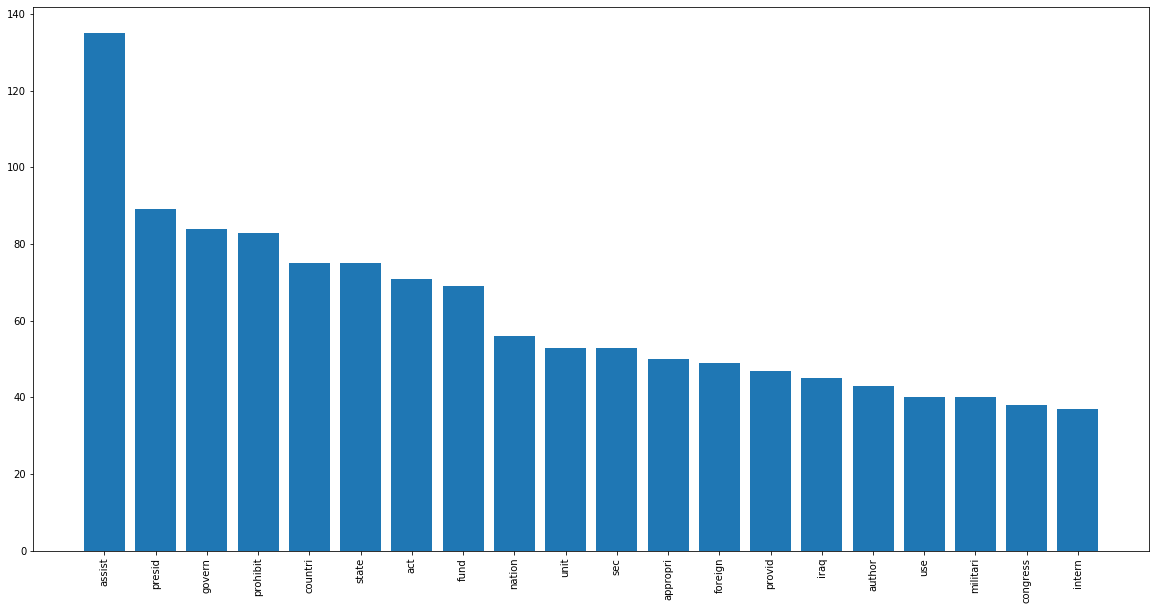

In [21]:
# plot
plt.bar(w.keys(), w.values())
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation=90)
plt.show()

In [22]:
sascat.head()

,content,id,clean
0,Provides for the enforcement of all provisions...,hr5114-101.1,provid enforc provis law impos sanction countr...
1,Requires the delivery of excess defense articl...,hr5114-101.2,requir deliveri excess defens articl nato alli...
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,prohibit make avail esf foreign militari finan...
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,prohibit oblig fund european bank reconstruct ...
4,Prohibits assistance to countries which fail t...,hr5114-101.5,prohibit assist countri fail take step prevent...


In [23]:
#f- what are the most frequent 10 NERs here (use unclean text)? Do they make sense to you?



from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
import pandas as pd

def get_continuous_chunks(text, chunk_func=ne_chunk):
    chunked = chunk_func(pos_tag(word_tokenize(text))) # we pos tag here
    continuous_chunk = []
    current_chunk = []

    for subtree in chunked:
        if type(subtree) == Tree:
            current_chunk.append(" ".join([token for token, pos in subtree.leaves()])) ##tells us to get out chunnks
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append(named_entity)
                current_chunk = []
        else:
            continue

    return continuous_chunk


sascat['ner']=sascat['content'].apply(lambda sent: get_continuous_chunks((sent)))
sascat.head()


,content,id,clean,ner
0,Provides for the enforcement of all provisions...,hr5114-101.1,provid enforc provis law impos sanction countr...,"[Iraq, Calls, Iraq Iraq, Iraq Kuwait, Iraq Ira..."
1,Requires the delivery of excess defense articl...,hr5114-101.2,requir deliveri excess defens articl nato alli...,"[NATO, NATO Yugoslavia, Treasury, U.S., Yugosl..."
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,prohibit make avail esf foreign militari finan...,"[Kenya, Congress, Kenyan]"
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,prohibit oblig fund european bank reconstruct ...,"[European Bank, Reconstruction, Polish, Polish..."
4,Prohibits assistance to countries which fail t...,hr5114-101.5,prohibit assist countri fail take step prevent...,"[U.S., United States]"


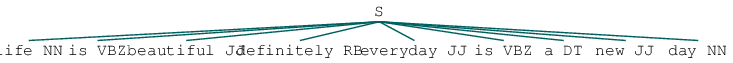

In [31]:
chunked=ne_chunk(pos_tag(word_tokenize("life is beautiful definitely everyday is a new day")))
chunked

In [ ]:
#g- plot the most common 20 NERs and compare to the plot of the 20 most common words plot


In [32]:
#convert list to string
sascat['ner'] = [' '.join(map(str, l)) for l in sascat['ner']]
sascat.head()




,content,id,clean,ner
0,Provides for the enforcement of all provisions...,hr5114-101.1,provid enforc provis law impos sanction countr...,Iraq Calls Iraq Iraq Iraq Kuwait Iraq Iraq Arm...
1,Requires the delivery of excess defense articl...,hr5114-101.2,requir deliveri excess defens articl nato alli...,NATO NATO Yugoslavia Treasury U.S. Yugoslavia ...
2,Prohibits making available any ESF or foreign ...,hr5114-101.3,prohibit make avail esf foreign militari finan...,Kenya Congress Kenyan
3,Prohibits the obligation of funds for the Euro...,hr5114-101.4,prohibit oblig fund european bank reconstruct ...,European Bank Reconstruction Polish Polish Uni...
4,Prohibits assistance to countries which fail t...,hr5114-101.5,prohibit assist countri fail take step prevent...,U.S. United States


In [34]:
unique_ner = set(sascat['ner'].str.split(' ').sum())

unique_ner_list=(list(sorted(unique_ner)))
print(unique_ner_list)
len(unique_ner_list)

['', 'AUC', 'Accords', 'Acquisition', 'Act', 'Administration', 'Affairs', 'Agency', 'Agricultural', 'America', 'American', 'Angola', 'Angolan', 'Appropriations', 'Arab', 'Armed', 'Armenia', 'Arms', 'Army', 'Asian', 'Assistance', 'Atlantic', 'Atoll', 'Atomic', 'Authority', 'Authorizes', 'Baltic', 'Bank', 'Belarus', 'Benue', 'Bosnia', 'Bosnian', 'Burma', 'Buy', 'CAF', 'CITES', 'Calls', 'Cambodia', 'Cambodian', 'Camp', 'Central', 'Chechnya', 'China', 'Chinese', 'City', 'Colombia', 'Colombian', 'Columbia', 'Commission', 'Committee', 'Committees', 'Commodity', 'Condemns', 'Congress', 'Control', 'Convention', 'Cooperation', 'Corporation', 'Corps', 'Council', 'Court', 'Credit', 'Criminal', 'Croatia', 'Cuba', 'Cuban', 'Cubans', 'Cyprus', 'DOD', 'David', 'Dayton', 'Defense', 'Demobilization', 'Democracy', 'Democratic', 'Development', 'District', 'Dominican', 'ELN', 'ESF', 'East', 'Eastern', 'Economic', 'Egypt', 'El', 'Endangered', 'Energy', 'Europe', 'European', 'Export', 'Export-Import', 'FARC

249

In [35]:
from collections import Counter
v_ner=Counter(" ".join(sascat["ner"]).split()).most_common(50)
print(v)
w_ner=Counter(" ".join(sascat["ner"]).split()).most_common(20)

[('assist', 135), ('presid', 89), ('govern', 84), ('prohibit', 83), ('countri', 75), ('state', 75), ('act', 71), ('fund', 69), ('nation', 56), ('unit', 53), ('sec', 53), ('appropri', 50), ('foreign', 49), ('provid', 47), ('iraq', 45), ('author', 43), ('use', 40), ('militari', 40), ('congress', 38), ('intern', 37), ('requir', 35), ('secretari', 35), ('support', 34), ('avail', 34), ('export', 32), ('sanction', 31), ('financi', 31), ('certifi', 31), ('human', 29), ('right', 29), ('committe', 27), ('respect', 26), ('institut', 26), ('interest', 26), ('unless', 26), ('person', 25), ('secur', 24), ('specifi', 24), ('arm', 23), ('direct', 23), ('report', 23), ('program', 23), ('cuba', 23), ('made', 22), ('forc', 21), ('includ', 21), ('belarus', 21), ('develop', 20), ('weapon', 20), ('make', 20)]


In [36]:
w_ner=dict(w_ner)
w_ner

{'Act': 15,
 'Arms': 8,
 'Assistance': 9,
 'Bank': 9,
 'Belarus': 19,
 'Committees': 12,
 'Congress': 37,
 'Cuba': 21,
 'Export': 8,
 'Guatemala': 9,
 'Iran': 12,
 'Iraq': 44,
 'Iraqi': 9,
 'Israel': 9,
 'Kuwait': 9,
 'Nations': 13,
 'Republic': 9,
 'States': 38,
 'U.S.': 78,
 'United': 50}

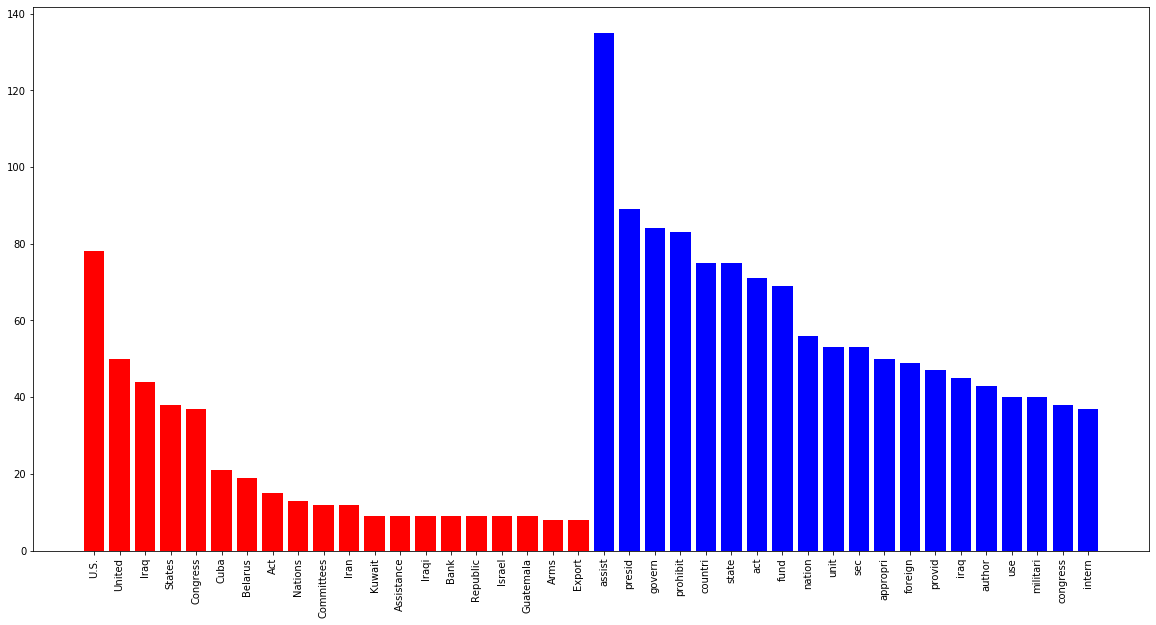

In [37]:
# plot
plt.bar(w_ner.keys(), w_ner.values(), color="r")
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation=90)
# plot
plt.bar(w.keys(), w.values(),color="b")
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation=90)
plt.show()


In [38]:
#different way

#dataset = codecs.open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv", "r", "utf-8").read()
#dataset


# first step you tokenize (read documentation to know the input of NER)
#dataset = nltk.word_tokenize(dataset)

# you use the pos-tagger (it gives you back a list of tuples (word,pos))
#pos_article = nltk.pos_tag(dataset)

# then you use the NER library
#ner = nltk.ne_chunk(pos_article)

#ner = [x for x in ner if type(x) == nltk.tree.Tree]
#ner

**Excercise 2**

Use Donald Trump tweets and improve his vocabulary by finding for his poor choice of adjectives - more sophisticated synonyms (e.g. "[bad] ratings on the Emmys last night" -> "[substandard] ratings on the Emmys last night")


Hints:
- check how to process a json file
- text processing (POS tagging + WordNet)
- discover how you can do this through wordnet




In [45]:
import json
with open("/Users/Ashrakat/Desktop/trump.json", "r") as read_file:
    data = json.load(read_file)

type(data)
data

[{'created_at': 'Sun Sep 09 17:28:17 +0000 2018',
  'favorite_count': 58893,
  'id_str': '1038841536316944386',
  'is_retweet': False,
  'retweet_count': 14348,
  'source': 'Twitter for iPhone',
  'text': 'Melania and I wish all Jewish people Shana Tova and send our warmest greetings to those celebrating Rosh Hashanah and the start of the High Holy Days... https://t.co/uMrHHX5il0'},
 {'created_at': 'Sun Sep 09 15:31:58 +0000 2018',
  'favorite_count': 63754,
  'id_str': '1038812262549663744',
  'is_retweet': False,
  'retweet_count': 16113,
  'source': 'Twitter for iPhone',
  'text': '...its commitment to denuclearize.” @FoxNews  This is a big and very positive statement from North Korea. Thank you To Chairman Kim. We will both prove everyone wrong! There is nothing like good dialogue from two people that like each other! Much better than before I took office.'},
 {'created_at': 'Sun Sep 09 15:21:22 +0000 2018',
  'favorite_count': 76054,
  'id_str': '1038809595219791872',
  'is_retwee

In [46]:

data = pd.read_json('/Users/Ashrakat/Desktop/trump.json') 
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Melania and I wish all Jewish people Shana Tov...,2018-09-09 17:28:17+00:00,14348,58893,False,1038841536316944384
1,Twitter for iPhone,...its commitment to denuclearize.” @FoxNews ...,2018-09-09 15:31:58+00:00,16113,63754,False,1038812262549663744
2,Twitter for iPhone,"North Korea has just staged their parade, cele...",2018-09-09 15:21:22+00:00,19684,76054,False,1038809595219791872
3,Twitter for iPhone,"Wow, NFL first game ratings are way down over ...",2018-09-09 14:42:41+00:00,21088,96574,False,1038799859128696832
4,Twitter for iPhone,“Trump has set Economic Growth on fire. During...,2018-09-09 14:12:18+00:00,16770,67080,False,1038792215617830912


In [47]:
data=data[0:100]

In [50]:
def nlp_pipeline(text):
    
    #lowering text
    text=text.lower()

    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # remove punctuation and numbers
    text = [token for token in text if token.isalpha()]#The isalpha() keeps here caracters in the string are alphabets
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_words]
    
    #pos tagging
    text = [nltk.pos_tag(text) for token in text]


    return text



In [51]:
data['clean'] = data['text'].apply(nlp_pipeline)

In [52]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,clean
0,Twitter for iPhone,Melania and I wish all Jewish people Shana Tov...,2018-09-09 17:28:17+00:00,14348,58893,False,1038841536316944384,"[[(melania, NN), (wish, JJ), (jewish, JJ), (pe..."
1,Twitter for iPhone,...its commitment to denuclearize.” @FoxNews ...,2018-09-09 15:31:58+00:00,16113,63754,False,1038812262549663744,"[[(commitment, NN), (foxnews, NNS), (big, JJ),..."
2,Twitter for iPhone,"North Korea has just staged their parade, cele...",2018-09-09 15:21:22+00:00,19684,76054,False,1038809595219791872,"[[(north, JJ), (korea, NNS), (staged, VBD), (p..."
3,Twitter for iPhone,"Wow, NFL first game ratings are way down over ...",2018-09-09 14:42:41+00:00,21088,96574,False,1038799859128696832,"[[(wow, NN), (nfl, CC), (first, JJ), (game, NN..."
4,Twitter for iPhone,“Trump has set Economic Growth on fire. During...,2018-09-09 14:12:18+00:00,16770,67080,False,1038792215617830912,"[[(trump, NN), (set, VBN), (economic, JJ), (gr..."


In [53]:
#pip install textblob
from textblob import TextBlob

def get_adjectives(text):
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

data['adjectives'] = data['text'].apply(get_adjectives)


In [54]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,clean,adjectives
0,Twitter for iPhone,Melania and I wish all Jewish people Shana Tov...,2018-09-09 17:28:17+00:00,14348,58893,False,1038841536316944384,"[[(melania, NN), (wish, JJ), (jewish, JJ), (pe...",[Jewish]
1,Twitter for iPhone,...its commitment to denuclearize.” @FoxNews ...,2018-09-09 15:31:58+00:00,16113,63754,False,1038812262549663744,"[[(commitment, NN), (foxnews, NNS), (big, JJ),...","[big, positive, wrong, good, other]"
2,Twitter for iPhone,"North Korea has just staged their parade, cele...",2018-09-09 15:21:22+00:00,19684,76054,False,1038809595219791872,"[[(north, JJ), (korea, NNS), (staged, VBD), (p...","[customary, nuclear, economic, “, nuclear]"
3,Twitter for iPhone,"Wow, NFL first game ratings are way down over ...",2018-09-09 14:42:41+00:00,21088,96574,False,1038799859128696832,"[[(wow, NN), (nfl, CC), (first, JJ), (game, NN...","[bad, last]"
4,Twitter for iPhone,“Trump has set Economic Growth on fire. During...,2018-09-09 14:12:18+00:00,16770,67080,False,1038792215617830912,"[[(trump, NN), (set, VBN), (economic, JJ), (gr...","[“, impossible, percent-plus]"


In [56]:
from nltk.corpus import wordnet 

data['syno'] = data['adjectives'].apply(lambda x: [wn.synsets(y) for y in x])
#get for element zero which is the word the lemma and the name of the synonym for anything that is larger than 0 otherwise enter nothing 
data['synonyms_question'] = data['syno'].apply( lambda x:[(y[0].lemmas() [0].name()) if len(y) >0 else "" for y in x])

In [57]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,clean,adjectives,syno,synonyms_question
0,Twitter for iPhone,Melania and I wish all Jewish people Shana Tov...,2018-09-09 17:28:17+00:00,14348,58893,False,1038841536316944384,"[[(melania, NN), (wish, JJ), (jewish, JJ), (pe...",[Jewish],[[Synset('jewish.a.01')]],[Jewish]
1,Twitter for iPhone,...its commitment to denuclearize.” @FoxNews ...,2018-09-09 15:31:58+00:00,16113,63754,False,1038812262549663744,"[[(commitment, NN), (foxnews, NNS), (big, JJ),...","[big, positive, wrong, good, other]","[[Synset('large.a.01'), Synset('big.s.02'), Sy...","[large, positive, wrong, good, other]"
2,Twitter for iPhone,"North Korea has just staged their parade, cele...",2018-09-09 15:21:22+00:00,19684,76054,False,1038809595219791872,"[[(north, JJ), (korea, NNS), (staged, VBD), (p...","[customary, nuclear, economic, “, nuclear]","[[Synset('customary.s.01'), Synset('accustomed...","[customary, nuclear, economic, , nuclear]"
3,Twitter for iPhone,"Wow, NFL first game ratings are way down over ...",2018-09-09 14:42:41+00:00,21088,96574,False,1038799859128696832,"[[(wow, NN), (nfl, CC), (first, JJ), (game, NN...","[bad, last]","[[Synset('bad.n.01'), Synset('bad.a.01'), Syns...","[bad, stopping_point]"
4,Twitter for iPhone,“Trump has set Economic Growth on fire. During...,2018-09-09 14:12:18+00:00,16770,67080,False,1038792215617830912,"[[(trump, NN), (set, VBN), (economic, JJ), (gr...","[“, impossible, percent-plus]","[[], [Synset('impossible.n.01'), Synset('impos...","[, impossible, ]"


In [58]:
def get_antonyms(input_lemma):
    antonyms = []
    for syn in wordnet.synsets(input_lemma):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
                return antonyms

In [60]:
from nltk.corpus import wordnet 

data['unpunctuated'] = data['text'].str.replace(r'[^\w\s]+', '')
data['tokenized'] = data['unpunctuated'].apply(word_tokenize) 
stop = stopwords.words('english')
data['stopped']= data['tokenized'].apply(lambda x: [item for item in x if item not in stop])
data['antonyms_question'] = data['stopped'].apply(lambda x: [get_antonyms(y) for y in x])


In [61]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,clean,adjectives,syno,synonyms_question,unpunctuated,tokenized,stopped,antonyms_question
0,Twitter for iPhone,Melania and I wish all Jewish people Shana Tov...,2018-09-09 17:28:17+00:00,14348,58893,False,1038841536316944384,"[[(melania, NN), (wish, JJ), (jewish, JJ), (pe...",[Jewish],[[Synset('jewish.a.01')]],[Jewish],Melania and I wish all Jewish people Shana Tov...,"[Melania, and, I, wish, all, Jewish, people, S...","[Melania, I, wish, Jewish, people, Shana, Tova...","[None, None, [begrudge], None, None, None, Non..."
1,Twitter for iPhone,...its commitment to denuclearize.” @FoxNews ...,2018-09-09 15:31:58+00:00,16113,63754,False,1038812262549663744,"[[(commitment, NN), (foxnews, NNS), (big, JJ),...","[big, positive, wrong, good, other]","[[Synset('large.a.01'), Synset('big.s.02'), Sy...","[large, positive, wrong, good, other]",its commitment to denuclearize FoxNews This i...,"[its, commitment, to, denuclearize, FoxNews, T...","[commitment, denuclearize, FoxNews, This, big,...","[None, None, None, None, [small], [negative], ..."
2,Twitter for iPhone,"North Korea has just staged their parade, cele...",2018-09-09 15:21:22+00:00,19684,76054,False,1038809595219791872,"[[(north, JJ), (korea, NNS), (staged, VBD), (p...","[customary, nuclear, economic, “, nuclear]","[[Synset('customary.s.01'), Synset('accustomed...","[customary, nuclear, economic, , nuclear]",North Korea has just staged their parade celeb...,"[North, Korea, has, just, staged, their, parad...","[North, Korea, staged, parade, celebrating, 70...","[[south], None, [unstaged], None, None, None, ..."
3,Twitter for iPhone,"Wow, NFL first game ratings are way down over ...",2018-09-09 14:42:41+00:00,21088,96574,False,1038799859128696832,"[[(wow, NN), (nfl, CC), (first, JJ), (game, NN...","[bad, last]","[[Synset('bad.n.01'), Synset('bad.a.01'), Syns...","[bad, stopping_point]",Wow NFL first game ratings are way down over a...,"[Wow, NFL, first, game, ratings, are, way, dow...","[Wow, NFL, first, game, ratings, way, already,...","[None, None, [middle], None, None, None, None,..."
4,Twitter for iPhone,“Trump has set Economic Growth on fire. During...,2018-09-09 14:12:18+00:00,16770,67080,False,1038792215617830912,"[[(trump, NN), (set, VBN), (economic, JJ), (gr...","[“, impossible, percent-plus]","[[], [Synset('impossible.n.01'), Synset('impos...","[, impossible, ]",Trump has set Economic Growth on fire During h...,"[Trump, has, set, Economic, Growth, on, fire, ...","[Trump, set, Economic, Growth, fire, During, t...","[None, [rise], None, [nondevelopment], [hire],..."


In [ ]:
#from nltk.corpus import wordnet
#from itertools import chain
#def get_synonyms(df, column_name, N):
#    L = []
#    for i in df[column_name]:
#        syn = wordnet.synsets(i)
        #flatten all lists by chain, remove duplicates by set
#        lemmas = list(set(chain.from_iterable([w.lemma_names() for w in syn])))
#        for j in lemmas[:N]:
#            #append to final list
          #  L.append([i, j])
#    #create DataFrame
#    return (pd.DataFrame(L, columns=['word','syn']))   

#this works

In [ ]:
#data['adjectives'] = [','.join(map(str, l)) for l in data['adjectives']]
#data.head()

In [ ]:
#df1 = get_synonyms(data, 'adjectives', 3)
#df1

In [ ]:
#solving it through lists


In [62]:
donald_tweets = data['text'].tolist()
donald_tweets

['Melania and I wish all Jewish people Shana Tova and send our warmest greetings to those celebrating Rosh Hashanah and the start of the High Holy Days... https://t.co/uMrHHX5il0',
 '...its commitment to denuclearize.” @FoxNews  This is a big and very positive statement from North Korea. Thank you To Chairman Kim. We will both prove everyone wrong! There is nothing like good dialogue from two people that like each other! Much better than before I took office.',
 'North Korea has just staged their parade, celebrating 70th anniversary of founding, without the customary display of nuclear missiles. Theme was peace and economic development. “Experts believe that North Korea cut out the nuclear missiles to show President Trump......',
 'Wow, NFL first game ratings are way down over an already really bad last year comparison. Viewership declined 13%, the lowest in over a decade. If the players stood proudly for our Flag and Anthem, and it is all shown on broadcast, maybe ratings could come b

In [63]:
import nltk
from nltk.corpus import wordnet as wn

for tweet in donald_tweets: #list of tweets
    print (tweet) #print tweet
    print(" ")
    tok_text = nltk.word_tokenize(tweet) #you need to tokenize tweet before the part of speech tagger, split it in words
    pos_text = nltk.pos_tag(tok_text) #pos tagging
    
    adjectives = [x[0] for x in pos_text if "J" in x[1]] 
    #if there is a j in the second element than take the first element
    #print(adjectives)
     
    
    for adj in adjectives: #you go to wordnet and substitute the adjectives
        senses = wn.synsets(adj) #go to wordnet and take the synonyms 
        print(senses)
        for sense in senses:
            print (sense.lemma_names())
    break
    
    #last step would be I want to know which one is the most sophisticated
    #use the least used one
    #we need to use a background corpus such as NYTimes

Melania and I wish all Jewish people Shana Tova and send our warmest greetings to those celebrating Rosh Hashanah and the start of the High Holy Days... https://t.co/uMrHHX5il0
 
[Synset('jewish.a.01')]
['Jewish', 'Judaic']
[Synset('warm.a.01'), Synset('warm.a.02'), Synset('warm.a.03'), Synset('affectionate.s.01'), Synset('strong.s.09'), Synset('quick.s.06'), Synset('ardent.s.02'), Synset('warm.s.08'), Synset('warm.s.09'), Synset('warm.s.10')]
['warm']
['warm']
['warm']
['affectionate', 'fond', 'lovesome', 'tender', 'warm']
['strong', 'warm']
['quick', 'warm']
['ardent', 'warm']
['warm']
['warm']
['warm']


In [ ]:
#[sense.lemma_names() for sense in senses]

**Excercise 3**

Make Donlald Trump tweets (use trump.json) nicer by finding adjectives with related antonyms (e.g. "bad ratings on the Emmys last night" -> "excellent ratings on the Emmys last night")

to do you need to combine:

- text processing (POS tagging + WordNet)
- check how to process a json file
- Hint: discover how you can do this through wordnet


In [ ]:
# solution above

**Excercise 4**



Extract the most popular 30 NERs (not entities!) from the entire corpus of the rt_dataset.tsv


In [64]:
import codecs, nltk

dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")


from collections import Counter

box = []

# how to quickly find an article from the dataset
for k in range(len(dataset)):
    article = dataset[k]
    if "Trump" in article and "Hillary" in article:
        article = dataset[4].split("\t")[3]
        
        # first step you tokenize (read documentation to know the input of NER)
        article = nltk.word_tokenize(article)

        # you use the pos-tagger (it gives you back a list of tuples (word,pos))
        pos_article = nltk.pos_tag(article)

        # then you use the NER library
        ner = nltk.ne_chunk(pos_article)
        
        ner = [x[0][0] for x in ner if type(x) == nltk.tree.Tree]
        
        for entity in ner:
            box.append(entity)

In [65]:
count = Counter(box)

print (count.most_common(30))

[('Clinton', 10902), ('Hillary', 2370), ('Democratic', 1896), ('Pneumonia', 1422), ('Bernie', 1422), ('HRC', 948), ('Jatras', 948), ('HillaryHealth', 948), ('Twitter', 948), ('HillarysHealth', 948), ('Republican', 948), ('Donald', 948), ('Trump', 948), ('Lisa', 474), ('Bardack', 474), ('Video', 474), ('Nick', 474), ('Chelsea', 474), ('Cappaqua', 474), ('PDT', 474), ('Reuters', 474), ('California', 474), ('San', 474), ('Los', 474), ('Las', 474), ('Nevada', 474), ('Jim', 474), ('US', 474), ('Campaign', 474), ('Media', 474)]


In [ ]:

dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")


from collections import Counter

box = []

# how to quickly find an article from the dataset
for k in range(len(dataset)):
    article = dataset[k]
    if "Trump" in article and "Hillary" in article:
        article = dataset[4].split("\t")[3]
        
        # first step you tokenize (read documentation to know the input of NER)
        article = nltk.word_tokenize(article)

        # you use the pos-tagger (it gives you back a list of tuples (word,pos))
        pos_article = nltk.pos_tag(article)

        # then you use the NER library
        ner = nltk.ne_chunk(pos_article)
        print(ner)
        ner = [x[0][1] for x in ner if type(x) == nltk.tree.Tree]
        
        for entity in ner:
            box.append(entity)